# Week 2

## Today

In this lecture, we will continue to work on the data. 

* **Part 1:** We will learn the differences between **different kinds of data sources**. We will go a bit through the theory, and then work on an exercise. 

* **Part 2:**  In the second part of this class, I will introduce you to **APIs**. We will use one API to gather some data on Computational Social Scientists and their works. 


## Part 1: Data Sources for Computational Social Science


We have seen how __DATA__ is central to Computational Social Science. But what data sources are we talking about? What are the limitations of different types of data sources? In the video below, I will give you an introduction to different types of data sources. As an example, I will introduce you to two studies that use two very different datasets to answer a similar question. 


> **_Video lecture_**: Watch the video below about Data Sources in Computational Social Science
>
> *Optional Reading: [The Spread of Behavior in an Online Social Network Experiment.](https://www.science.org/doi/full/10.1126/science.1185231)* This is the article describing the first study I talk about in the video.    
> *Optional Reading: [Exercise contagion in a global social network.](https://www.nature.com/articles/ncomms14753)* This is the article describing the second study I talk about in the video.    

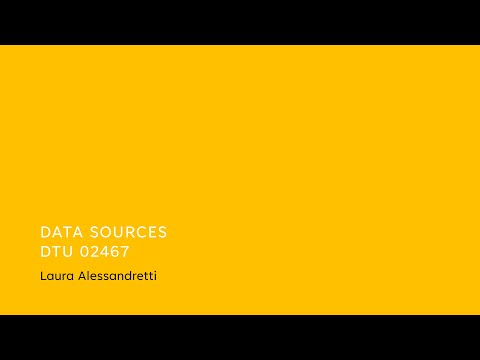

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("Hr5yKJaQUhE",width=600, height=337.5)


In this course, we are going to focus mostly on observational data collected online to address social science questions. So, I would like us to reflect a little bit more on what it means to use *Ready made* data in the social science, and understand its advantages and challenges. This is something that you can read about in Sections 2.1 to 2.3 of the book _Bit by Bit_. 

> *Reading*: [Bit by Bit, sections 2.1 to 2.3](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/observing-intro/) Read sections 2.1 to 2.3. I don't expect you to read all the details, but to have a general understanding of advantages and challenges of large observational datasets (a.k.a. Big Data/Ready made data) for social science research.

## Part 2: Using APIs to download  data

In this class, we will work with *Ready made* data. The second thing we will learn today is how to get data ready made data using APIs. We will do it using the Academic Graph API provided by Semantic Scholar. The Academic Graph API enables you to gather information on scientists and their publications. 

I made a short video for you to get familiar with the API. Check it out here below. 



> **_Video lecture_**: Watch the video below about APIs ([here is the notebook I used in the video](https://nbviewer.org/github/lalessan/comsocsci2023/blob/master/additional_notebooks/API_example.ipynb) )  

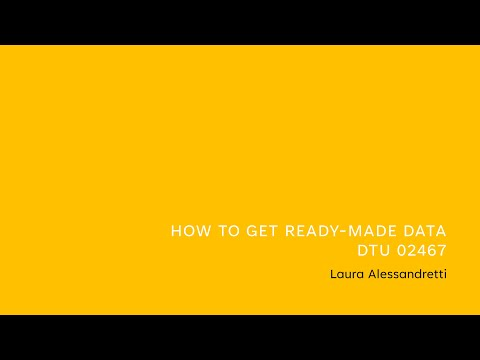

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("7AQO3vJptvg",width=600, height=337.5)


> **Exercise: A list APIs for Computational Social Science research.** Work in pairs. 
>
> - Use the web to look for two APIs that could be used for gathering interesting data (from a Computational Social Science perspective). 
>     - *Data description*: describe in a couple of lines the data types that you can gather using this API
>     - *Rate limits*: What are the rate limits of the free version of the API? 
> - Add your APIs to [this list](https://docs.google.com/spreadsheets/d/1LHdU-E6msMduqIHOvWGqn1uAbo5YjVwft2YkVu5subY/edit?usp=sharing) (**note: if someone had your same idea before you, just add your resource to the list a second time**).   
>


## Prelude to part 3: Pandas Dataframes


Before starting, we will learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are built using numpy, which is in turn built in C, so they are a quite efficient data structure. You will find it quite useful :)

Pandas dataframes should be intuitive to use. **I suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) to learn what you need to solve the next exercise.**

## Part 3: Getting data from the Semantic Scholar API

All right, so now we will start gathering some data on Computational Social Scientists and their publications. 
We will do this in steps. 
There is a lot of data to gather and process, so be patient. 
Feel free to team up if you find it useful and if you have any issues, come and ask me or the TAs. 

> **Exercise : Find potential Computational Social Scientists** In this exercise, we are going to find a list of potential authors of Computational Social Science papers using the Semantic Scholar API. The idea here is that we will find the researchers who have been to a conference on Computational Social Science or have worked with someone who has.
>
> 1. Consider the set of unique researcher names that you collected in Week 1, Exercise 3 (considering all years). Use the _author_ endpoint of the [Academic Graph API](https://api.semanticscholar.org/api-docs/graph#tag/Author-Data) to _search_ these researchers in the database based on their names. For each researcher in your list, find: 
>     - their _authorId_ (the unique identifier in the Semantic Scholar API). **Hint**: the first result is typically the one the better matches your query. 
>     - the _authorId_ of their collaborators. **Hint**: check out the field papers.authors
> 2. Save the list of ids of the authors and their collaborators. 

> **Exercise : Find potential Computational Social Science papers** Now, we are going to look for works by these researchers. 
>
> 1. Consider the list of author ids you have found in the exercise above. For each author, use the Academic Graph API to find:
>
>    - their _aliases_
>    - their _name_
>    - their _papers_, where for each paper we want to retain: 
>        -  _title_ 
>        -  _abstract_ 
>        -  the _year_ of publication
>        -  the _externalIds_ (this is because there are universal identifiers for scientific works called DOI that we can use across platforms)
>        -  _s2FieldsOfStudy_ the fields of study
>        - _citationCount_ the number of times that this paper was cited    
>    (**Hint**: you can find authors in batches)
>    
>
> 2. Create three dataframes to store the data you have collected. 
>    
>    - **Author dataset:** in the author dataset, one raw is one unique author, and each row contains the following information: 
>        - *authorId*: (str) the id of the author
>        - *name*: (str) the name of the author
>        - *aliases*: (list) the aliases of the author
>        - *citationCount*: (int) the total number of citations received by an author
>        - *field*: (str) the _s2FieldsOfStudy_ that occurs most times across an author's papers (you should first obtain the *category* for each _s2FieldsOfStudy_)
>    - **Paper dataset:** in the paper dataset, one row is one unique paper, and each row contains the following information:
>        - *paperId*: (str) the id of the paper
>        - *title*: (str) the title of the paper
>        - *year*: (int) the year of publication
>        - *externalId.DOI:* (str) the DOI of the paper
>        - *citationCount*: (int) the number of citations
>        - *fields*: (list) the fields included in the paper (you should first obtain the *category* for each _s2FieldsOfStudy_)
>        - *authorIds:* (list) this is a list of *author Ids*, including all the authors of this paper that are in our author dataset
>    - **Paper abstract dataset:** in the paper abstract dataset, one row is one unique paper, and each row contains the following information: 
>        - *paperId*: (str) the id of the paper
>        - *abstract*: (str) the abstract of the paper    
>  (Note: we keep the abstract separate to keep the size of files more manageable)
>       
> 3. Save the three dataframes to file.
> 4. How long is the _Author_ dataframe? How long is the _Paper_ dataframe? 
> 5. One person per pair: go to [DTU Learn](https://learn.inside.dtu.dk/d2l/home/145262) and fill the Survey "_Week 2 - Semantic Scholar API data_"

# Your Feedback
I hope you enjoyed today's class. It would be awesome if you could spend a few minutes to share your feedback.    
**Go to [DTU Learn](https://learn.inside.dtu.dk/d2l/home/145262) and fill the Survey "_Week 2 - Feedback"_.**